# **Slot Attention-based Classifier for Explainable Image Recognition**



Loading Project and Dependencies

In [ ]:
! git clone -b bt https://github.com/alankriti-mallick/scouter-project.git

Cloning into 'scouter-project'...
remote: Enumerating objects: 329, done.
remote: Counting objects: 100% (329/329), done.
remote: Compressing objects: 100% (256/256), done.
remote: Total 329 (delta 84), reused 301 (delta 61), pack-reused 0
Receiving objects: 100% (329/329), 2.54 MiB | 5.71 MiB/s, done.
Resolving deltas: 100% (84/84), done.


In [ ]:
%cd scouter-project

/content/scouter-project


In [ ]:
! pwd

/content/scouter-project


Load Saved Data from Google drive

In [ ]:
# Mount Google-Drive for saved_data

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%%bash
# Loading saved Models

DIR="/content/gdrive/MyDrive/scouter-project/saved_data.zip"
if [ -f "$DIR" ]; then
   echo "'$DIR' found and now copying files, please wait ..."

   # copying files
   cp $DIR ./

   # unzipping
   echo "Extracting...."
   unzip saved_data.zip

   # moving vis folder inside sloter folder
   rm -rf ./sloter/vis
   mv ./vis ./sloter

   # removing zip file
   rm -rf saved_data.zip
   echo "Complete!"
else
   echo "Warning: '$DIR' NOT found."
fi

'/content/gdrive/MyDrive/scouter-project/saved_data.zip' found and now copying files, please wait ...
Extracting....
Archive:  saved_data.zip
   creating: data/
   creating: data/mnist/
   creating: data/mnist/MNIST/
   creating: data/mnist/MNIST/raw/
 extracting: data/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz  
  inflating: data/mnist/MNIST/raw/t10k-images-idx3-ubyte  
  inflating: data/mnist/MNIST/raw/train-images-idx3-ubyte.gz  
  inflating: data/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz  
  inflating: data/mnist/MNIST/raw/t10k-labels-idx1-ubyte  
 extracting: data/mnist/MNIST/raw/train-labels-idx1-ubyte.gz  
  inflating: data/mnist/MNIST/raw/train-labels-idx1-ubyte  
  inflating: data/mnist/MNIST/raw/train-images-idx3-ubyte  
   creating: data/mnist/MNIST/processed/
  inflating: data/mnist/MNIST/processed/training.pt  
  inflating: data/mnist/MNIST/processed/test.pt  
   creating: saved_model/
  inflating: saved_model/MNIST_use_slot_checkpoint.pth  
  inflating: saved_model/MNIST_u

Installing Dependencies

In [ ]:
%%bash
pip install thop
pip install tensorly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.7/229.7 kB 4.4 MB/s eta 0:00:00


## Pre-processing

In [ ]:
! python train.py --dataset BT --model resnet18 --batch_size 32 --epochs 5 \
--num_classes 4 --use_slot false --vis false --aug false \
# --resume true --epoch 12 --pre_dir saved_model/MNIST_no_slot_checkpoint.pth

Not using distributed mode
train model: without slot positive loss
number of params: 10493440
Start training
start train :0
100% 89/89 [00:20<00:00,  4.41it/s]
start val :0
100% 13/13 [00:06<00:00,  2.07it/s]
train loss: [0.418]
val loss: [1.202]
train acc: [0.847]
val acc: [0.682]
train CE loss [0.0]
val CE loss [0.0]
train attention loss [0.0]
val attention loss [0.0]
start train :1
100% 89/89 [00:19<00:00,  4.51it/s]
start val :1
100% 13/13 [00:05<00:00,  2.37it/s]
train loss: [0.418, 0.068]
val loss: [1.202, 0.944]
train acc: [0.847, 0.985]
val acc: [0.682, 0.784]
train CE loss [0.0, 0.0]
val CE loss [0.0, 0.0]
train attention loss [0.0, 0.0]
val attention loss [0.0, 0.0]
start train :2
100% 89/89 [00:20<00:00,  4.42it/s]
start val :2
100% 13/13 [00:03<00:00,  3.31it/s]
train loss: [0.418, 0.068, 0.021]
val loss: [1.202, 0.944, 1.182]
train acc: [0.847, 0.985, 0.998]
val acc: [0.682, 0.784, 0.768]
train CE loss [0.0, 0.0, 0.0]
val CE loss [0.0, 0.0, 0.0]
train attention loss [0.0, 

# TRAINING MODEL

Positive Scouter for BT dataset

In [ ]:
! python train.py --dataset BT --model resnet18 --batch_size 32 --epochs 5 \
--num_classes 4 --use_slot true --use_pre true --loss_status 1 --slots_per_class 1 \
--power 1 --to_k_layer 1 --lambda_value 1. --vis false --channel 512 --aug false \
# --resume true --pre_dir saved_model/BT_use_slot_checkpoint.pth

Not using distributed mode
load pre dataset parameter over
train model: use slot positive loss
number of params: 10559808
Start training
start train :0
100% 89/89 [00:23<00:00,  3.74it/s]
start val :0
100% 13/13 [00:03<00:00,  3.34it/s]
train loss: [1.141]
val loss: [1.571]
train acc: [0.898]
val acc: [0.763]
train CE loss [0.47]
val CE loss [0.945]
train attention loss [0.671]
val attention loss [0.626]
start train :1
100% 89/89 [00:22<00:00,  4.01it/s]
start val :1
100% 13/13 [00:05<00:00,  2.17it/s]
train loss: [1.141, 0.718]
val loss: [1.571, 1.84]
train acc: [0.898, 0.981]
val acc: [0.763, 0.763]
train CE loss [0.47, 0.093]
val CE loss [0.945, 1.248]
train attention loss [0.671, 0.625]
val attention loss [0.626, 0.592]
start train :2
100% 89/89 [00:20<00:00,  4.25it/s]
start val :2
100% 13/13 [00:05<00:00,  2.37it/s]
train loss: [1.141, 0.718, 1.044]
val loss: [1.571, 1.84, 1.723]
train acc: [0.898, 0.981, 0.875]
val acc: [0.763, 0.763, 0.61]
train CE loss [0.47, 0.093, 0.466]
val


Negative Scouter for BT dataset

In [ ]:
! python train.py --dataset BT --model resnet18 --batch_size 32 --epochs 5 \
--num_classes 4 --use_slot true --use_pre false --loss_status -1 --slots_per_class 2 \
--power 2 --to_k_layer 1 --lambda_value 1.5 --vis false --channel 512 --aug false --freeze_layers 3 \
# --resume true --pre_dir saved_model/BT_use_slot_negative_checkpoint.pth

Not using distributed mode
train model: use slot negetive loss
number of params: 8460352
Start training
start train :0
100% 89/89 [00:20<00:00,  4.38it/s]
start val :0
100% 13/13 [00:05<00:00,  2.54it/s]
train loss: [1.883]
val loss: [2.434]
train acc: [0.652]
val acc: [0.551]
train CE loss [0.916]
val CE loss [1.729]
train attention loss [0.644]
val attention loss [0.47]
start train :1
100% 89/89 [00:21<00:00,  4.22it/s]
start val :1
100% 13/13 [00:04<00:00,  2.66it/s]
train loss: [1.883, 0.832]
val loss: [2.434, 1.728]
train acc: [0.652, 0.876]
val acc: [0.551, 0.688]
train CE loss [0.916, 0.348]
val CE loss [1.729, 1.308]
train attention loss [0.644, 0.322]
val attention loss [0.47, 0.28]
start train :2
100% 89/89 [00:22<00:00,  4.00it/s]
start val :2
100% 13/13 [00:04<00:00,  3.02it/s]
train loss: [1.883, 0.832, 0.714]
val loss: [2.434, 1.728, 1.691]
train acc: [0.652, 0.876, 0.876]
val acc: [0.551, 0.688, 0.71]
train CE loss [0.916, 0.348, 0.36]
val CE loss [1.729, 1.308, 1.382]
t

# TESTING

Positive Scouter for BT dataset

In [ ]:
! python test.py --dataset BT --model resnet18 --batch_size 32 --epochs 10 \
--num_classes 4 --use_slot true --use_pre true --loss_status 1 --slots_per_class 1 \
--power 1 --to_k_layer 1 --lambda_value 1. --vis true --channel 512 --aug false

label	 0
tensor([1], device='cuda:0')
1


### ALL TESTCASES

In [ ]:
! python all-test.py --dataset BT --model resnet18 --batch_size 32 --epochs 10  \
--num_classes 4 --use_slot true --use_pre true --loss_status 1 --slots_per_class 1 \
--power 1 --to_k_layer 1 --lambda_value 1. --vis true --channel 512 --aug false --device cpu

Starting test :
Total =  293
Correct =  255
Accuracy =  87.03071672354949


Negative Scouter for BT dataset

In [ ]:
! python test.py --dataset BT --model resnet18 --batch_size 32 --epochs 10 \
--num_classes 4 --use_slot true --use_pre false --loss_status -1 --slots_per_class 2 \
--power 2 --to_k_layer 1 --lambda_value 1.5 --vis true --channel 512 --aug false --freeze_layers 3

label	 0
tensor([2], device='cuda:0')
2


# VISUALIZATION

Custom Test

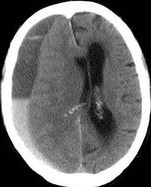

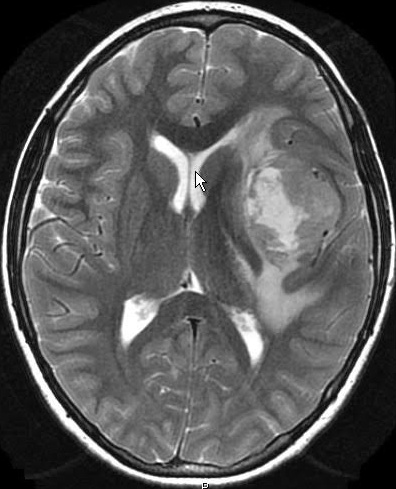

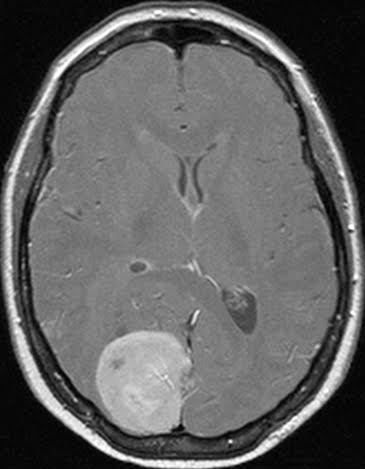

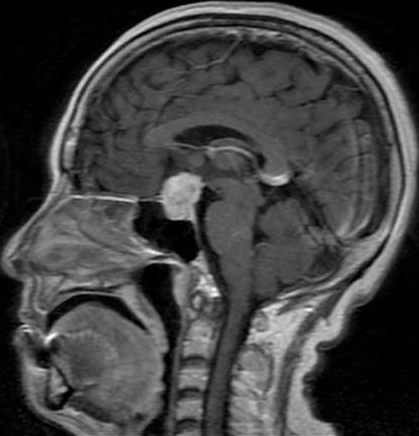

In [ ]:
from IPython.display import Image, display, HTML
from test_custom import run_custom_test

CLASS_NAMES = {3: "pituitary_tumor", 0: "no_tumor",
               2: "meningioma_tumor", 1: "glioma_tumor"}

images = ['0.jpg', '1.jpg', '2.jpg', '3.jpg']
for image in images:
  display(Image(f'./test-images/BT/{image}'))

  result = run_custom_test(image=image, dataset='BT', device='cpu')
  display(HTML(f'<br /><h1>The Output is {CLASS_NAMES[result]}</h1><br />'))

Analysis

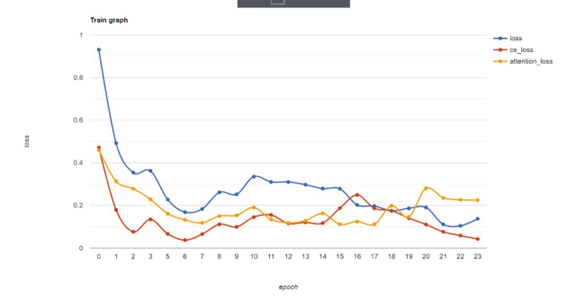

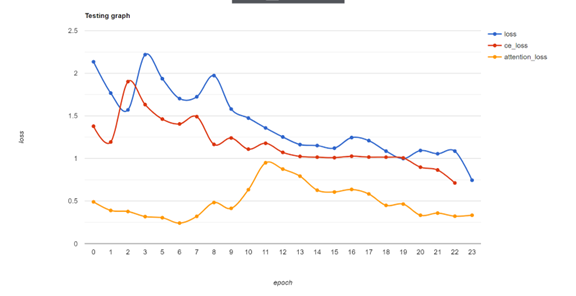

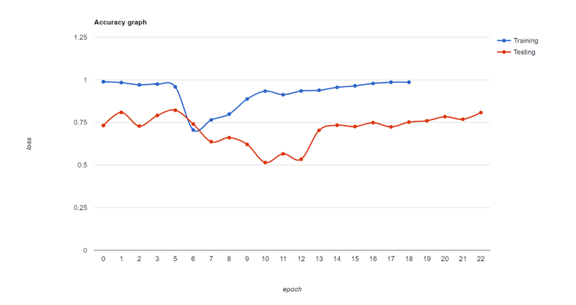

In [ ]:
from IPython.display import Image, display
display(Image('./fig/BT/train-loss.png'))
display(Image('./fig/BT/test-loss.png'))
display(Image('./fig/BT/accuracy.png'))

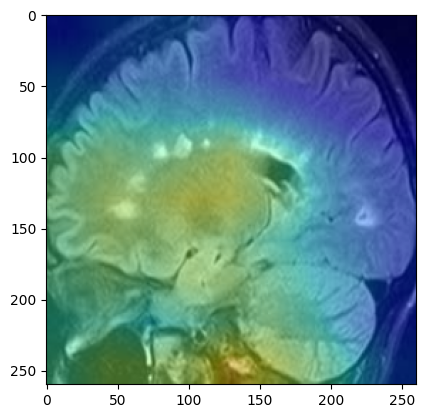

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img1 = Image.open('./sloter/vis/slot_mask_1.png')
plt.imshow(img1)

In [ ]:
from IPython.display import HTML, Image

def _src_from_data(data):
    """Base64 encodes image bytes for inclusion in an HTML img element"""
    img_obj = Image(data=data)
    for bundle in img_obj._repr_mimebundle_():
        for mimetype, b64value in bundle.items():
            if mimetype.startswith('image/'):
                return f'data:{mimetype};base64,{b64value}'

def gallery(images, row_height='auto'):
    figures = []
    for image in images:
        src = _src_from_data(image)
        figures.append(f'''
            <figure style="margin: 5px !important;">
              <img src="{src}" style="height: {row_height}">
            </figure>
        ''')

    return HTML(data=f'''
        <div style="display: flex; flex-flow: row wrap; text-align: center;">
        {''.join(figures)}
        </div>
    ''')


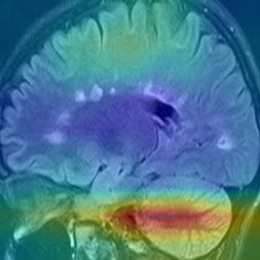
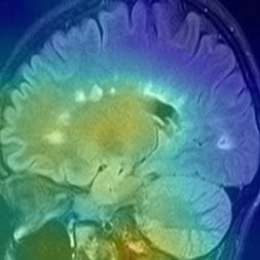
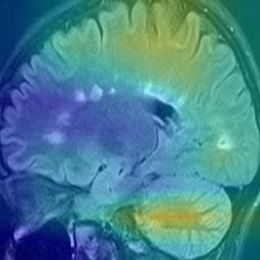
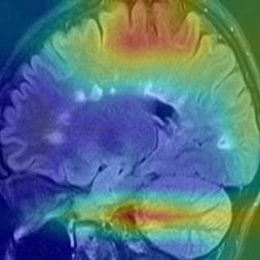

In [ ]:
slot_images = []
for i in range(0, 4):
  slot_images.append(f'./sloter/vis/slot_mask_{i}.png')

gallery(slot_images)


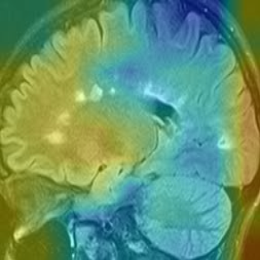
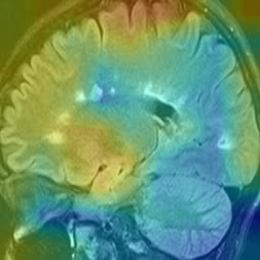
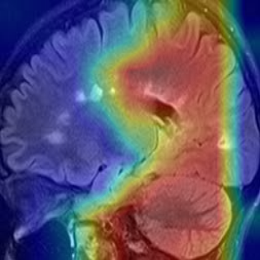
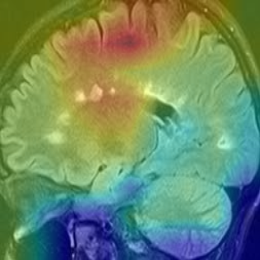

In [ ]:
slot_images = []
for i in range(0, 4):
  slot_images.append(f'./sloter/vis/slot_mask_{i}.png')

gallery(slot_images)

## Post Processing and Saving Data

In [ ]:
%%bash
# Zipping data, saved_model and sloter/vis
echo "Generating zip....."
zip -r saved_data.zip ./data ./saved_model
cd ./sloter/
zip -r ../saved_data.zip ./vis
echo "Complete"

Generating zip.....
  adding: data/ (stored 0%)
  adding: data/BT/ (stored 0%)
  adding: data/BT/raw/ (stored 0%)
  adding: data/BT/raw/Testing/ (stored 0%)
  adding: data/BT/raw/Testing/glioma_tumor/ (stored 0%)
  adding: data/BT/raw/Testing/glioma_tumor/image(66).jpg (deflated 20%)
  adding: data/BT/raw/Testing/glioma_tumor/image(12).jpg (deflated 8%)
  adding: data/BT/raw/Testing/glioma_tumor/image(24).jpg (deflated 8%)
  adding: data/BT/raw/Testing/glioma_tumor/image(64).jpg (deflated 7%)
  adding: data/BT/raw/Testing/glioma_tumor/image(6).jpg (deflated 10%)
  adding: data/BT/raw/Testing/glioma_tumor/image(57).jpg (deflated 5%)
  adding: data/BT/raw/Testing/glioma_tumor/image(4).jpg (deflated 10%)
  adding: data/BT/raw/Testing/glioma_tumor/image(35).jpg (deflated 4%)
  adding: data/BT/raw/Testing/glioma_tumor/image(74).jpg (deflated 13%)
  adding: data/BT/raw/Testing/glioma_tumor/image(17).jpg (deflated 2%)
  adding: data/BT/raw/Testing/glioma_tumor/image(10).jpg (deflated 5%)
  ad

Save data to drive

In [ ]:
# Mount Google-Drive for saved_data
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%%bash

DIR="/content/gdrive/MyDrive/scouter-project/"
if [ -d "$DIR" ]; then
   echo "'$DIR' found and now copying files, please wait ..."
else
   echo "Warning: '$DIR' NOT found. Creating the folder..."
   mkdir $DIR
fi

cp saved_data.zip $DIR
echo "Copying Complete!"

'/content/gdrive/MyDrive/scouter-project/' found and now copying files, please wait ...
Copying Complete!
